In [96]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/fifa-22-complete-player-dataset/female_players_17.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_20.csv
/kaggle/input/fifa-22-complete-player-dataset/players_15.csv
/kaggle/input/fifa-22-complete-player-dataset/players_16.csv
/kaggle/input/fifa-22-complete-player-dataset/Career Mode female player datasets - FIFA 16-22.xlsx
/kaggle/input/fifa-22-complete-player-dataset/players_17.csv
/kaggle/input/fifa-22-complete-player-dataset/players_18.csv
/kaggle/input/fifa-22-complete-player-dataset/players_19.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_16.csv
/kaggle/input/fifa-22-complete-player-dataset/players_22.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_18.csv
/kaggle/input/fifa-22-complete-player-dataset/players_21.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_19.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_22.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_21.cs

In [97]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use("ggplot")
color_pal = sns.color_palette()

In [98]:
df = pd.read_csv('/kaggle/input/fifa-22-complete-player-dataset/players_22.csv', low_memory=False)

In [99]:
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [100]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [101]:
df.shape


(19239, 110)

In [102]:
df = df[df.columns.drop(list(df.filter(regex='url')))]
df.shape


(19239, 104)

In [103]:
df.dtypes

sofifa_id            int64
short_name          object
long_name           object
player_positions    object
overall              int64
                     ...  
lcb                 object
cb                  object
rcb                 object
rb                  object
gk                  object
Length: 104, dtype: object

In [129]:
features = ['overall', 'potential','wage_eur', 'value_eur','age']
df = df.dropna(subset=features)

In [105]:
data = df[features].copy()
data.head()

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30


In [106]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


In [107]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,1.916500e+04,19165.000000
mean,65.760188,71.079990,9021.721889,2.850452e+06,25.190034
std,6.882803,6.087721,19476.005074,7.613700e+06,4.727515
min,47.000000,49.000000,500.000000,9.000000e+03,16.000000
25%,61.000000,67.000000,1000.000000,4.750000e+05,21.000000
50%,66.000000,71.000000,3000.000000,9.750000e+05,25.000000
75%,70.000000,75.000000,8000.000000,2.000000e+06,29.000000
max,93.000000,95.000000,350000.000000,1.940000e+08,43.000000


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19165 entries, 0 to 19238
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   overall    19165 non-null  int64  
 1   potential  19165 non-null  int64  
 2   wage_eur   19165 non-null  float64
 3   value_eur  19165 non-null  float64
 4   age        19165 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 898.4 KB


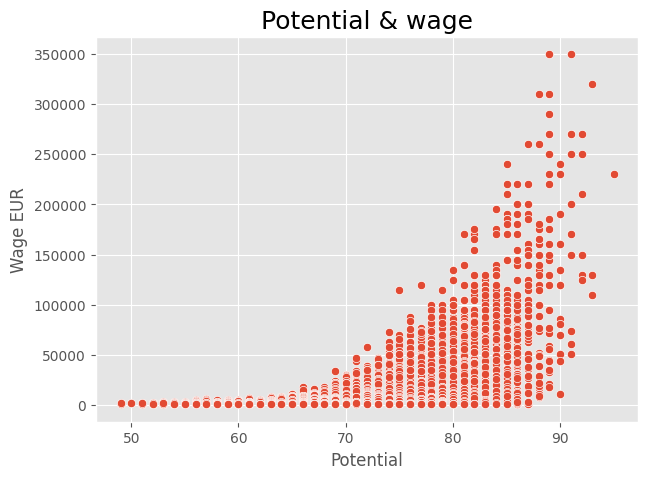

In [109]:
plt.figure(figsize=(7, 5))
ax = sns.scatterplot(x =data['potential'], y = data['wage_eur'])
plt.xlabel("Potential") 
plt.ylabel("Wage EUR")
plt.title("Potential & wage", fontsize = 18)
plt.show()

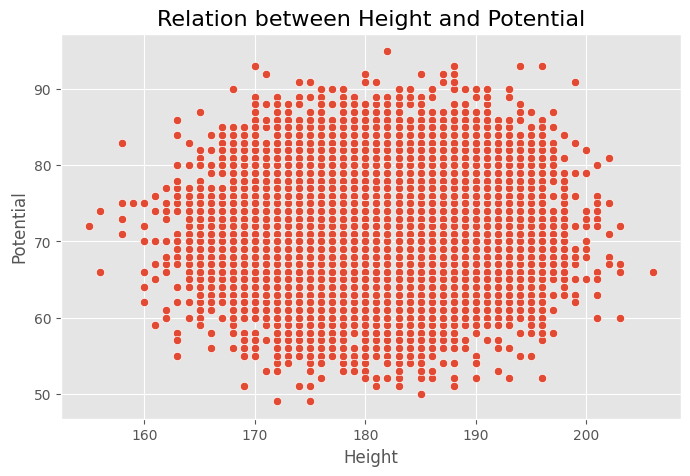

In [110]:
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.scatterplot(x =df['height_cm'], y = df['potential'])
plt.xlabel("Height") 
plt.ylabel("Potential")
plt.title("Relation between Height and Potential", fontsize = 16)
plt.show()

In [111]:
top_10 = df.nlargest(15, 'overall')
top_10.head(10)

,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,...,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,188545,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,...,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,...,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,190871,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,...,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,192985,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1991-06-28,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3
5,200389,J. Oblak,Jan Oblak,GK,91,93,112000000.0,130000.0,28,1993-01-07,...,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3,89+3
6,231747,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,194000000.0,230000.0,22,1998-12-20,...,63+3,63+3,63+3,67+3,63+3,54+3,54+3,54+3,63+3,18+3
7,167495,M. Neuer,Manuel Peter Neuer,GK,90,90,13500000.0,86000.0,35,1986-03-27,...,43+3,43+3,43+3,37+3,35+3,34+3,34+3,34+3,35+3,88+2
8,192448,M. ter Stegen,Marc-André ter Stegen,GK,90,92,99000000.0,250000.0,29,1992-04-30,...,41+3,41+3,41+3,33+3,31+3,33+3,33+3,33+3,31+3,88+3
9,202126,H. Kane,Harry Kane,ST,90,90,129500000.0,240000.0,27,1993-07-28,...,68+3,68+3,68+3,67+3,64+3,61+3,61+3,61+3,64+3,20+3


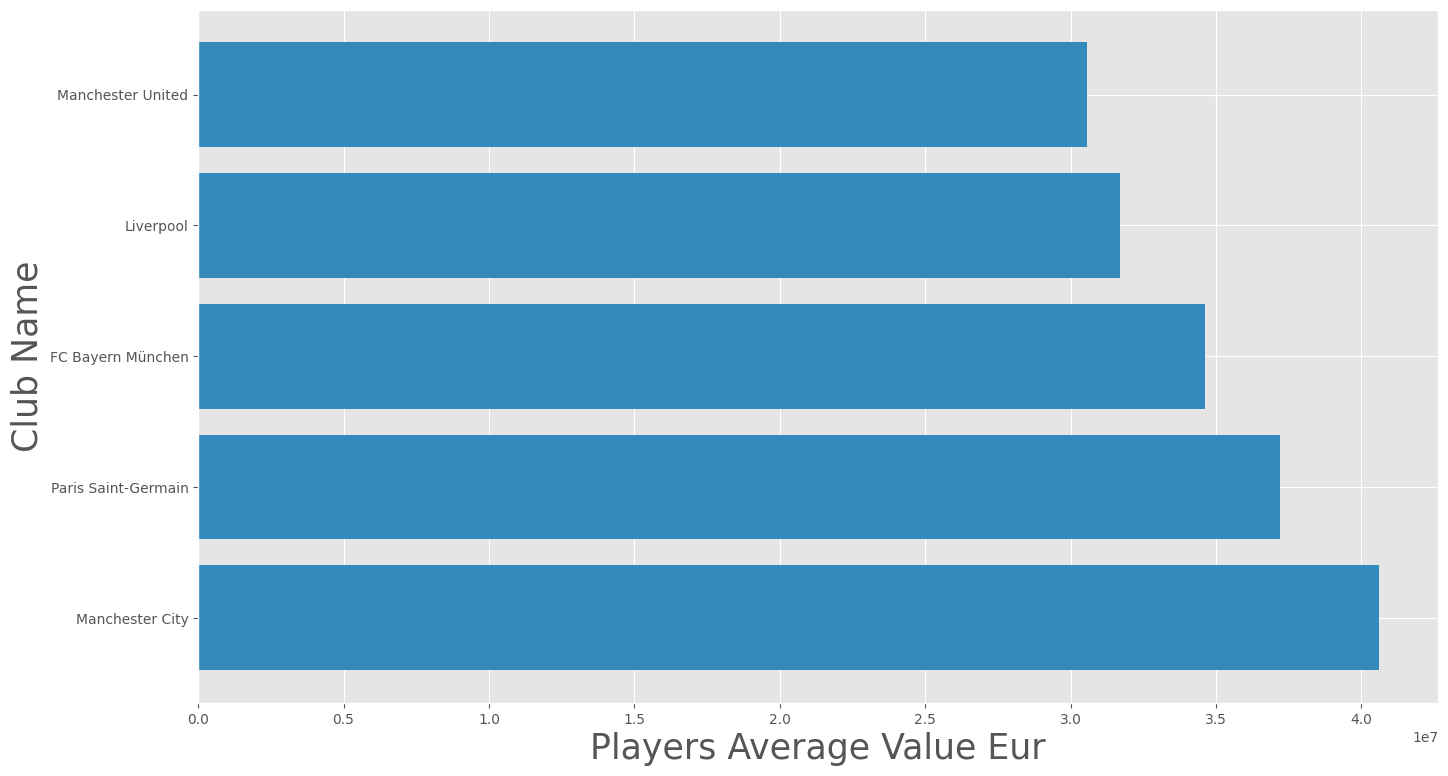

In [112]:
# what top 5 Club with highest players value ?
 
df.groupby('club_name')['value_eur'].mean().sort_values(ascending=False).head(5).plot(
    kind='barh',
    color=color_pal[1],
    width=0.8,
    figsize=(16, 9)
)

plt.xlabel('Players Average Value Eur', fontsize=25)
plt.ylabel('Club Name', fontsize=25)
plt.show()

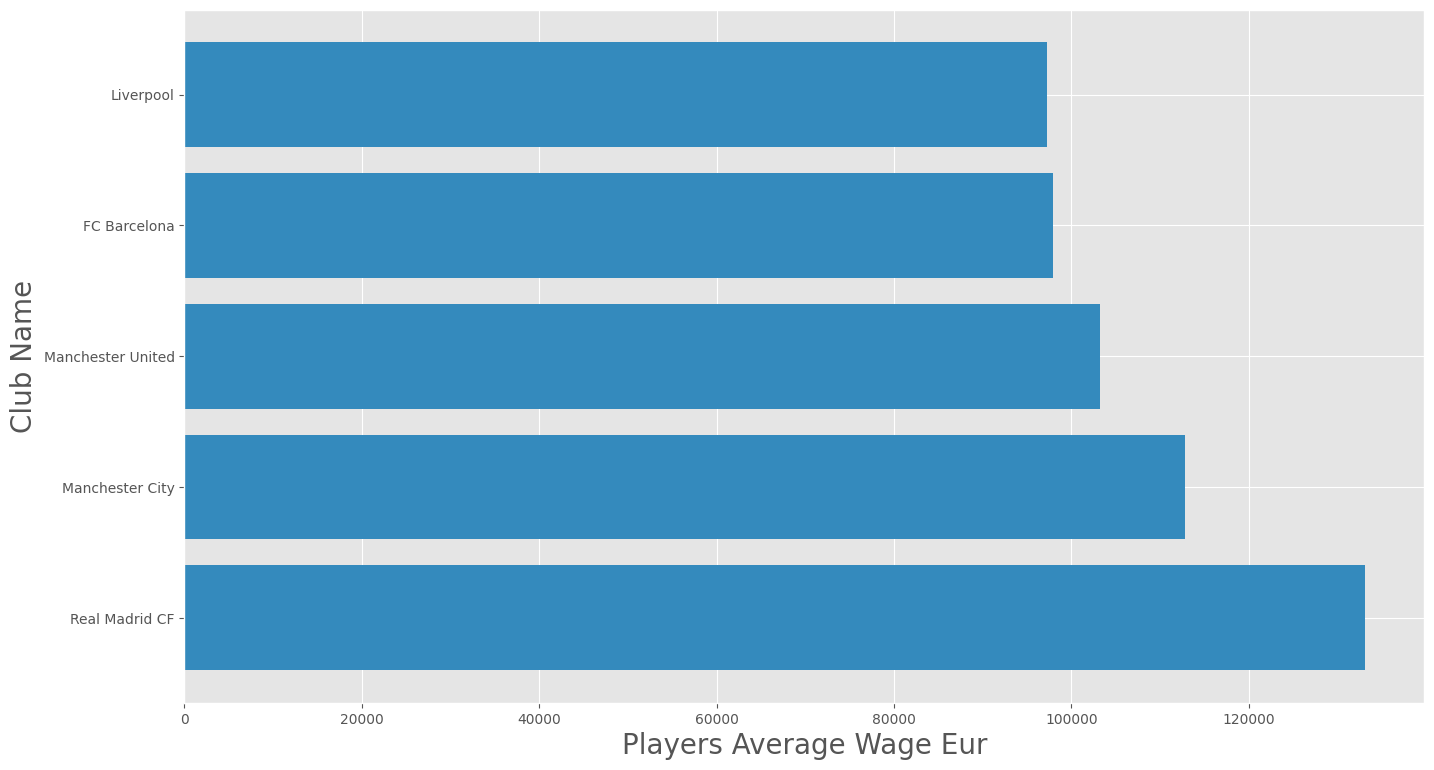

In [113]:
# top 5 Club with highest wages

df.groupby('club_name')['wage_eur'].mean().sort_values(ascending=False).head(5).plot(
    kind='barh',
    color=color_pal[1],
    width=0.8,
    figsize=(16, 9)
)

plt.xlabel('Players Average Wage Eur', fontsize=20)
plt.ylabel('Club Name', fontsize=20)
plt.show()

In [114]:
df.sort_values('wage_eur',ascending=False)[['short_name','player_positions']].head(10)

,short_name,player_positions
11,K. Benzema,"CF, ST"
4,K. De Bruyne,"CM, CAM"
0,L. Messi,"RW, ST, CF"
24,T. Kroos,CM
14,Casemiro,CDM
27,R. Sterling,"LW, RW"
1,R. Lewandowski,ST
16,S. Mané,LW
17,M. Salah,RW
3,Neymar Jr,"LW, CAM"


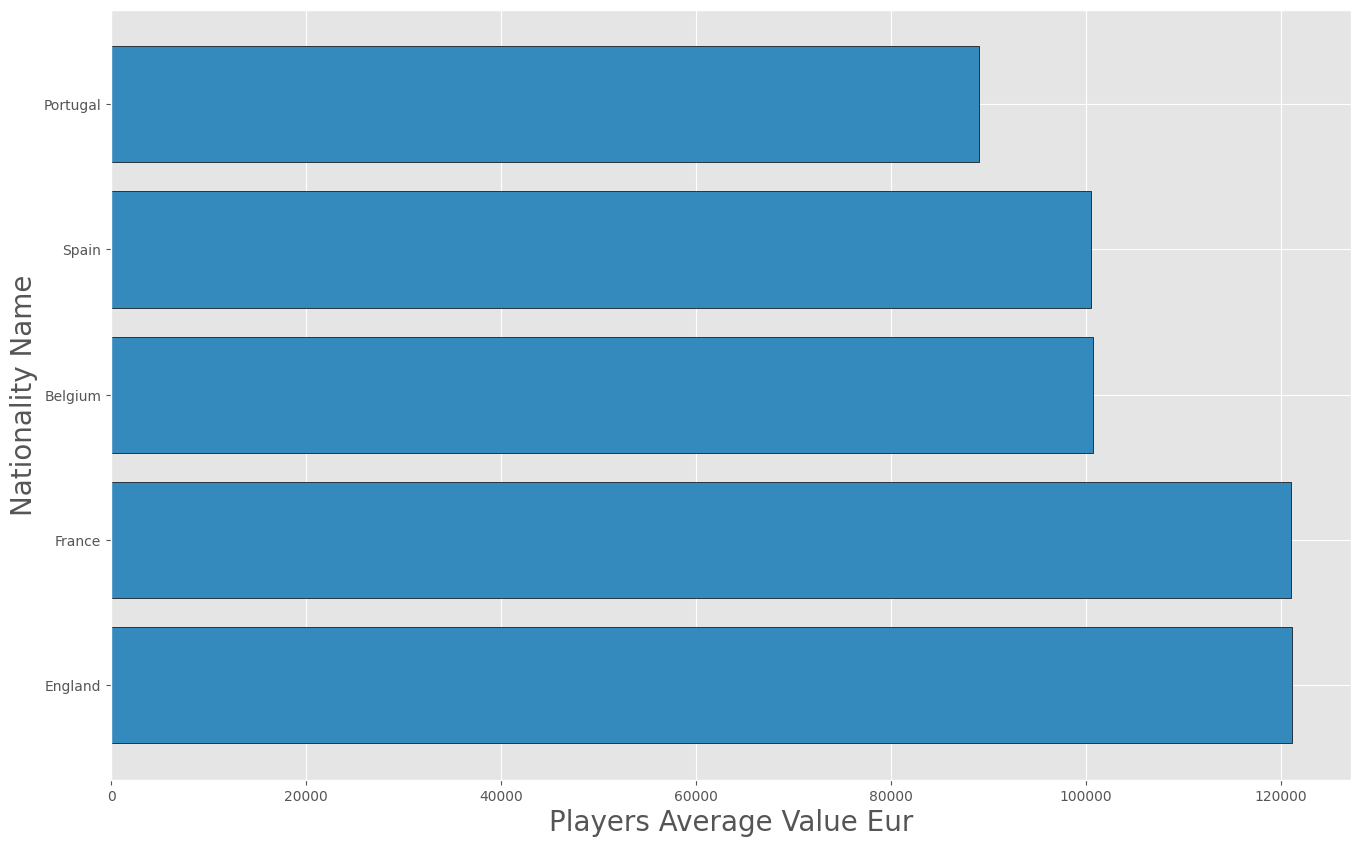

In [115]:
# what National teams have most Average Value 

df = df.loc[df['nation_team_id'] >= 1]
df.groupby('nationality_name')['wage_eur'].mean().sort_values(ascending=False).head(5).plot(
    kind='barh',
    color=color_pal[1],
    width=0.8,
    figsize=(16, 10),
    edgecolor='black'
)

plt.xlabel('Players Average Value Eur', fontsize=20)
plt.ylabel('Nationality Name', fontsize=20)
plt.show()

In [116]:
df.groupby(['preferred_foot']).count()[['sofifa_id']]

,sofifa_id
preferred_foot,
Left,178
Right,520


In [117]:
df

,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,...,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,188545,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,...,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,...,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
4,192985,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1991-06-28,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3
6,231747,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,194000000.0,230000.0,22,1998-12-20,...,63+3,63+3,63+3,67+3,63+3,54+3,54+3,54+3,63+3,18+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13648,231131,J. McGarry,James Robert McGarry,"LB, LM",62,69,750000.0,800.0,23,1998-04-09,...,57+2,57+2,57+2,61+2,60+2,56+2,56+2,56+2,60+2,14+2
13886,245041,Zhu Chenjie,朱辰杰,CB,62,74,900000.0,2000.0,20,2000-08-23,...,60+2,60+2,60+2,59+2,60+2,62+2,62+2,62+2,60+2,15+2
13948,248165,A. Rațiu,Andrei Florin Rațiu,"RM, RW, CM",62,71,875000.0,2000.0,23,1998-06-20,...,59+2,59+2,59+2,61+2,60+2,59+2,59+2,59+2,60+2,16+2
14476,219392,A. Rufer,Alex Arthur Rufer,"CM, CDM",61,64,425000.0,900.0,25,1996-06-12,...,60+2,60+2,60+2,59+2,58+2,58+2,58+2,58+2,58+2,17+2


In [118]:
#Most common player position can be one of the important factors
most_player = df['player_positions'].value_counts().head(10)
most_player

player_positions
CB         94
GK         91
ST         65
CDM, CM    34
CM, CDM    31
RB         21
CM         19
LB         15
CM, CAM    12
LB, LM     11
Name: count, dtype: int64

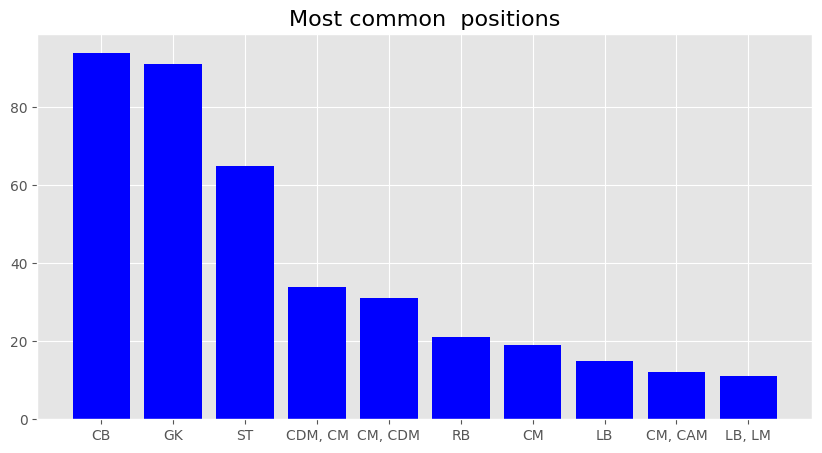

In [120]:
positions_count = most_player.values
player_positions = most_player.index
plt.figure(figsize= (10,5))
plt.bar(player_positions,positions_count,color = 'blue')
plt.title('Most common  positions', fontsize=16)
plt.show()

In [121]:
missing_values_rows = df[df.isnull().any(axis=1)]
print("Rows containing missing values:")
print(missing_values_rows)

Rows containing missing values:
       sofifa_id         short_name                            long_name  \
0         158023           L. Messi       Lionel Andrés Messi Cuccittini   
1         188545     R. Lewandowski                   Robert Lewandowski   
2          20801  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
4         192985       K. De Bruyne                      Kevin De Bruyne   
6         231747          K. Mbappé                 Kylian Mbappé Lottin   
...          ...                ...                                  ...   
13648     231131         J. McGarry                 James Robert McGarry   
13886     245041        Zhu Chenjie                                  朱辰杰   
13948     248165           A. Rațiu                  Andrei Florin Rațiu   
14476     219392           A. Rufer                    Alex Arthur Rufer   
14860     254513        C. Eriksson     Carljohan Daniel Viktor Eriksson   

      player_positions  overall  potential    value_eur

In [124]:
data


,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19
